In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x = np.array([1,2,3])
#x.shape = (3,1)

x1,x2,x3 = x

In [7]:
x1

1

# Q1

First we define a test function:

In [8]:

x0 = np.reshape(np.array([1.0, 1.4]),(2,1))


test = lambda x: np.reshape(np.array([x[0,0]**2-x[0,0]-1.0, np.log(3.0*x[1,0]**2-x[0,0])]),(2,1))

gtest = lambda x: np.array([ [2.0*x[0,0]-1.0, 0.0],
                             [-1./(x[1,0]**2-x[0,0]), 6.0*x[1,0]/(3.0*x[1,0]**2-x[0,0])]])


Here I define them so that they take an np.array as input and return np.array as output. Hence, I take it for granted that both f and g are np.array-valued functions in the Newton-Raphson method routine below. However, as you can see, the definition of the functions are not very cute. 

An alternative approach would be to allow these functions to be "array-like"-valued, and then define the Newton-Raphson routine so that it convert them into np.array's. 



In [9]:
def NRmethodm(f,g,x0, xtol=1e-6, ftol=1e-6, max_iter=1000):
    
    # Newton-Raphson method for a vector-valued function
    # f: function
    # g: Jacobian function
    # x0: initial condition
    
    x, fx, gx = x0, f(x0), g(x0)
    
    xp = np.empty_like(x)
    
    i_iter = 0
    

    while i_iter<=max_iter:
        i_iter += 1
        
        dx = - np.linalg.solve(gx,fx)
        xp = x+dx
        
        x[:], fx[:], gx[:] = xp, f(xp), g(xp)        
        
        print('Iteration step n = ' + str(i_iter) + ', x[n+1] (transposed) = ' + str(x.T))
        
        if np.linalg.norm(dx,np.inf) <= xtol*(1+np.linalg.norm(x,np.inf)):
            break

    if i_iter == max_iter:
        print('Max. number of iteration reached. A solution may not be accurate.')
        return x
    elif np.linalg.norm(fx,np.inf)<=ftol: 
        print('Newton-Raphson method converged.')
        return x
    else:
        print('Newton-Raphson method failed to find a solution.')
        return x
   

In [10]:
sol = NRmethodm(test,gtest,x0)

print('')
print('Evaluate the test function at the computed solution. (Transposed)')
print(test(sol).T)

Iteration step n = 1, x[n+1] (transposed) = [[ 2.          1.08426484]]
Iteration step n = 2, x[n+1] (transposed) = [[ 1.66666667  1.07983264]]
Iteration step n = 3, x[n+1] (transposed) = [[ 1.61904762  0.93567165]]
Iteration step n = 4, x[n+1] (transposed) = [[ 1.61803445  0.93459376]]
Iteration step n = 5, x[n+1] (transposed) = [[ 1.61803399  0.93417215]]
Iteration step n = 6, x[n+1] (transposed) = [[ 1.61803399  0.93417236]]
Newton-Raphson method converged.

Evaluate the test function at the computed solution. (Transposed)
[[  0.00000000e+00  -3.40172335e-13]]


# Q2

Using the parameter values and the functional form assumptions, we can write the Euler equation as:

$$ 0 = f(x; \epsilon) := \epsilon \frac{1-x}{x} + (1-\epsilon)\frac{1-x}{\frac{1}{1-\epsilon}+ x}-1.$$

$$ \frac{\partial f(x;\epsilon)}{\partial x} = -\frac{\epsilon}{x^2} - \frac{2-\epsilon}{(\frac{1}{1-\epsilon}+ x)^2}.$$

We have $n=91$ values of $\epsilon$, $\{\epsilon_i\}_{i=1}^n$, and want to solve

$$ 0= f(x_i;\epsilon_i)$$

for all $i=1,2,...,n$. 

Of course we can obtain a solution $\{x_i\}_{i=1}^n$ by solving a univariate root-finding problem for $n=91$ times. This is a brute-force method.

One way to speed up a brute-force method is to use a solution to the $(i-1)$-th problem as the initial condition for the $i$-th problem, because we expect that solutions are close if $\epsilon$'s are close. This is called a "warm start" as opposed to a "cold-start," which sets the initial condition independent of previous computation results. 

We can, however, solve for all $\{x_i\}_{i=1}^n$ **at once**. Note that a Newton iterate at step $k$ for each $i$ takes the form:

$$ x_i(k+1) = g_i(x_i(k)) := x_i(k) - \frac{\partial f(x_i(k);\epsilon_i)}{\partial x}f(x_i(k);\epsilon_i).$$

Hence by defining

$$ \textbf{x} = \left[\begin{array}{c}
				x_1\\
				x_2\\
				\vdots\\
				x_n
				\end{array}\right],$$

$$ \textbf{e} = \left[\begin{array}{c}
				\epsilon_1\\
				\epsilon_2\\
				\vdots\\
				\epsilon_n
				\end{array}\right],$$

and

$$ G(\mathbf{x};\mathbf{e}) = \left[\begin{array}{c}
				g_1(x_1)\\
				g_2(x_2)\\
				\vdots\\
				g_n(x_n)
				\end{array}\right],$$
                
we can do a fixed-point iteration for a vector-valued function $G$:

$$ \textbf{x}(k+1) = G(\textbf{x}(k);\mathbf{e}).$$


Time elapsed =  0.0016544379759579897  sec.


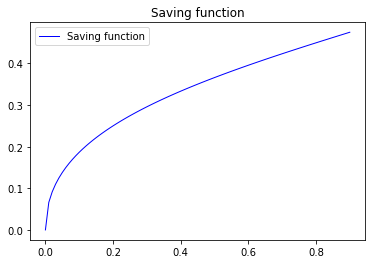

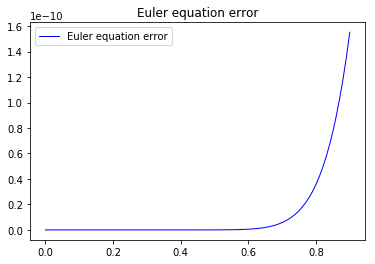

In [3]:
import time

n = 91
eps_v = np.reshape(np.linspace(0.0,0.9,num=n), (n,1))   # vector of epsilon's
x0 = np.zeros_like(eps_v)+0.01 # initial condition


G = lambda x,e: x- ((-e/(x**2)-(2-e)/((1.0/(1-e)+x)**2)))**(-1)*((e*(1.0/x-1.)+(1-e)*(1.0-x)/(1.0/(1-e)+x))-1.0)


max_iter = 1000
xtol = 1.0e-8

i_iter = 0

xp = np.empty_like(x0)
x = np.empty_like(x0)
x[:] = x0

start_time = time.perf_counter()

while i_iter<=max_iter:
    xp[:] = G(x,eps_v)

    if np.linalg.norm(xp-x,np.inf) <= xtol*(1+np.linalg.norm(x,np.inf)):
            break
    x[:] = xp
    i_iter += 1

if i_iter == max_iter:
    print('Max. number of iteration reached. A solution may not be accurate.')

    
end_time = time.perf_counter()
   
print('Time elapsed = ', end_time-start_time, ' sec.')    
    
fig, ax = plt.subplots()

ax.plot(eps_v, x, 'b-', linewidth=1, label='Saving function')
ax.legend(loc='upper left')
ax.set_title('Saving function')

plt.show()

fig1, ax1 = plt.subplots()

ax1.plot(eps_v, G(x,eps_v)-x, 'b-', linewidth=1, label='Euler equation error')
ax1.legend(loc='upper left')
ax1.set_title('Euler equation error')

plt.show()

In [4]:
x

array([[  3.68439678e-17],
       [  6.61956363e-02],
       [  9.13252487e-02],
       [  1.09847895e-01],
       [  1.25000000e-01],
       [  1.38026263e-01],
       [  1.49560874e-01],
       [  1.59978236e-01],
       [  1.69520847e-01],
       [  1.78356181e-01],
       [  1.86605497e-01],
       [  1.94359845e-01],
       [  2.01689593e-01],
       [  2.08650415e-01],
       [  2.15287228e-01],
       [  2.21636875e-01],
       [  2.27729999e-01],
       [  2.33592404e-01],
       [  2.39246049e-01],
       [  2.44709800e-01],
       [  2.50000000e-01],
       [  2.55130913e-01],
       [  2.60115073e-01],
       [  2.64963562e-01],
       [  2.69686232e-01],
       [  2.74291885e-01],
       [  2.78788425e-01],
       [  2.83182976e-01],
       [  2.87481988e-01],
       [  2.91691321e-01],
       [  2.95816316e-01],
       [  2.99861860e-01],
       [  3.03832435e-01],
       [  3.07732163e-01],
       [  3.11564848e-01],
       [  3.15334006e-01],
       [  3.19042897e-01],
 

Note that, depending on the initial condition, we may encounter the limited domain problem for this problem. (This is not specific to the fixed point iteration. Even if you solve root-finding problems for each $i$, you may encounter that.)

The brute-force approach using the bisection method is more robust, but must take longer to converge. 



# Q3

We try to find a minimizer of 
\begin{eqnarray*}
f(x) = \left\{ \begin{array}{lc}
				\ln x & \mbox{ if $x\ge 1$, and}\\
				\frac{1}{2}(x^2-1) & \mbox{ if $x < 1$.}
				\end{array}\right. ,
\end{eqnarray*}
which is $x=0$.


Consider sequences $\{x_n\}$, $\{p_n\}$, and $\{\alpha_n\}$ such that

- $p_n = -1$ for all $n=0,1,...$;
- $\alpha_n = \frac{1}{2^{n+1}}$ for all $n=0,1,...$; and
- $x_0=2$ and $x_{n+1} = x_n +\alpha_n p_n$ for $n=0,1,...$. 

### (1) $x_n \in (1,2]$ for all $n$

$x_{n+1} = x_n -\frac{1}{2^{n+1}} = x_0 - \sum_{i=1}^{n+1} \frac{1}{2^{i}} = 2- \sum_{i=1}^{n+1} \frac{1}{2^{i}}.$

Because, for any finite $n$, 

$$ 0< \sum_{i=1}^{n+1} \frac{1}{2^{i}} <\sum_{i=1}^{\infty} \frac{1}{2^{i}} = 1,$$

it follows that $x_n \in (1,2]$ for all $n$.

### (2) $x_n \downarrow 1$ as $n\rightarrow \infty$

This is obvious because $\sum_{i=1}^{n+1} \frac{1}{2^{i}}$ is increasing in $n$ and $\sum_{i=1}^{n+1} \frac{1}{2^{i}} \rightarrow 1$ as $n\rightarrow \infty$. 

### (3) the first Wolfe condition is satisfied for all $n$. (Hint: $f$ is a concave function for $x\ge 1$.)

Because $x_n \in (1,2]$ for all $n$, 

$$ f(x_n) = \ln x_n$$

for all $n$. 

Because $f$ is a concave function on $[1,2]$, 

$$ f(x_{n+1}) < f(x_n) + f'(x_n)(x_{n+1}-x_n) = f(x_n) -f'(x_n)\alpha_n. $$

On the other hand, the first Wolfe condition for the single dimensional function $f$ is 

$$ f(x_{n+1}) \le f(x_n) +c_1 \alpha_n p_n f'(x_n) = f(x_n) -c_1 \alpha_n f'(x_n) $$

for small $c_1 \in (0,1)$. Because $f'>0$ on $[1,2]$, 

$$ f(x_{n+1}) < f(x_n) + f'(x_n)(x_{n+1}-x_n) = f(x_n) -f'(x_n)\alpha_n < f(x_n) -c_1 \alpha_n f'(x_n). $$

Hence the first Wolfe condition is automatically satisfied. 

### What happens when we impose the second condition

The second Wolfe condition requires 

$$ -f'(x_1) \ge -c_2 f'(x_0) $$

for $c_2 \in (c_1,1)$.

Hence,

$$ -f'(x_1) \ge -c_2 \frac{1}{2} \Rightarrow f'(x_1) \le \frac{c_2}{2} $$

for $c_2 \in (c_1,1)$.

Given the search direction $p_0 = -1$, we have to have $x_1 < x_0 = 2$. The derivative of $f$ at $x_1$ can be less than or equal to $c_2/2$ if and only if

$$ x_1 \le {\frac{c_2}{2}}. $$

The maximal value $x_1 = x_0+\alpha_0 p_0$ can take is therefore ${\frac{c_2}{2}}$.


As you can see, the second Wolfe condition requires you to take a larger step and it prevents us from getting stuck at a point that is not a local minima.

# Q4




In [3]:
from scipy import optimize 

thetaH = 2.0
thetaL = 1.0
UH = 0.0
UL = 0.0

# x = (qH,pH,qL,pL)

def cost(x):
    return 0.5*(x[0]**2-x[1] + x[2]**2 - x[3]) # Expected cost = 0.5*( qH^2-pH + qL^2-pL )


def cost_der(x):
    g = np.zeros_like(x)
    g[0] = x[0]
    g[1] = -0.5
    g[2] = x[2]
    g[3] = -0.5
    return g

def const(x):
    c = np.zeros(4)
    c[0] =thetaH*x[0]-x[1]-UH # individual rationality for H
    c[1] =thetaL*x[2]-x[3]-UL # individual rationality for L
    c[2] =thetaH*x[0]-x[1]-(thetaH*x[2]-x[3]) # Incentive compatibility for H
    c[3] =thetaL*x[2]-x[3]-(thetaL*x[0]- x[1]) # Incentive compatibility for L
    return c

def const_jac(x):
    jac = np.array([[thetaH, -1.0, 0.0, 0.0],
                    [0.0, 0.0, thetaL, -1.0],
                    [thetaH, -1.0, -thetaH, 1.0],
                    [-thetaL, 1.0, thetaL, -1.0]])
    return jac


cons = ({'type': 'ineq', 'fun': const, 'jac': const_jac})

res = optimize.minimize(cost, [0., 0., 0., 0.], jac=cost_der, method='SLSQP', 
                        constraints=cons, options={'disp': True, 'ftol': 1.0e-8})
                    
print('-----')
print(res)



Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.49999999990997734
            Iterations: 8
            Function evaluations: 8
            Gradient evaluations: 8
-----
     fun: -0.49999999990997734
     jac: array([  1.00001342e+00,  -5.00000000e-01,  -5.27197904e-16,
        -5.00000000e-01])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([  1.00001342e+00,   2.00002684e+00,  -5.27197904e-16,
        -4.37563776e-16])


The solution is separating. The H type faces higher price and higher quality than does the L type.

To see which constraints are not binding, let us evaluate the constraint function at the solution:

In [4]:
print('-----')
print('Constraint evaluated at the solution')
print(const(res.x))

-----
Constraint evaluated at the solution
[  2.22044605e-15  -8.96341288e-17   2.83727808e-15   1.00001342e+00]


The last value is different from zero, so the IC for the L type is slack.

The remaining values are close to zero, but they may happen to be so. 

To check whether they are binding or not, we can either relax or tighten each of these constraints to examine whether the solution changes or not.

First the IR constraint for L. This constraint is binding:

In [5]:
UL = -0.1

res1 = optimize.minimize(cost, [0., 0., 0., 0.], jac=cost_der, method='SLSQP', 
                        constraints=cons, options={'disp': True, 'ftol': 1.0e-8})

print('')
print('Solution when UL=', UL)
print(res1.x)
print('Changes in the solution')
print(res1.x-res.x)

UL = 0.0

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.594999999665983
            Iterations: 7
            Function evaluations: 7
            Gradient evaluations: 7

Solution when UL= -0.1
[ 1.00002585  2.00005169  0.1         0.2       ]
Changes in the solution
[  1.24283166e-05   2.48566332e-05   1.00000000e-01   2.00000000e-01]


Then the IC constraint for H. I add 0.1 to the LHS of the IC for H to relax the constraint. 

This constraint is also binding.

In [6]:


def const2(x):
    c = np.zeros(4)
    c[0] =thetaH*x[0]-x[1]-UH # individual rationality for H
    c[1] =thetaL*x[2]-x[3]-UL # individual rationality for L
    c[2] =thetaH*x[0]-x[1]-(thetaH*x[2]-x[3])+0.1 # Incentive compatibility for H
    c[3] =thetaL*x[2]-x[3]-(thetaL*x[0]- x[1]) # Incentive compatibility for L
    return c

cons2 = ({'type': 'ineq', 'fun': const2, 'jac': const_jac})
res2 = optimize.minimize(cost, [0., 0., 0., 0.], jac=cost_der, method='SLSQP', 
                        constraints=cons2, options={'disp': True, 'ftol': 1.0e-8})

print('')
print('Solution when the IC is relaxed')
print(res2.x)
print('Changes in the solution')
print(res2.x-res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.5450000000000005
            Iterations: 7
            Function evaluations: 7
            Gradient evaluations: 7

Solution when the IC is relaxed
[ 1.   2.   0.1  0.1]
Changes in the solution
[ -1.34179968e-05  -2.68359936e-05   1.00000000e-01   1.00000000e-01]


Finally, the IR for the H type is slack:

In [31]:

UH = -0.1

res3 = optimize.minimize(cost, [0., 0., 0., 0.], jac=cost_der, method='SLSQP', 
                        constraints=cons, options={'disp': True, 'ftol': 1.0e-8})

print('')
print('Solution when UH=', UH)
print(res3.x)
print('Changes in the solution')
print(res3.x-res.x)

UH = 0.0

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.49999999920423527
            Iterations: 8
            Function evaluations: 8
            Gradient evaluations: 8

Solution when UH= -0.1
[  1.00002180e+00   2.00007701e+00  -3.34137913e-05  -3.34137913e-05]
Changes in the solution
[  8.37764229e-06   5.01690759e-05  -3.34137913e-05  -3.34137913e-05]


This is natural. If both the IR and the IC for the H type are slack, then the seller can increase her profit by raising the price for the H type. So either one of them has to be binding. In this example, UH is sufficiently low and the IR is slack for the H type. Hence the IC for the H type binds. 

In sum, the IC for the H type and the IR for the L type bind.

Now let us raise $\theta_H$.

Higher $\theta_H$ implies that the H type is willing to pay more for the same quality. This allows the seller to achieve higher profit by increasing the quality qH and the price pH. The effects on qL and pL are small. 

In [32]:
thetaH = 3.0

res_high_thetaH = optimize.minimize(cost, [0., 0., 0., 0.], jac=cost_der, method='SLSQP', 
                        constraints=cons, options={'disp': True, 'ftol': 1.0e-8})
                    
print('')
print('Solution when thetaH=', thetaH)
print(res_high_thetaH.x)
print('Changes in the solution')
print(res_high_thetaH.x-res.x)

thetaH = 6.0

res_high_thetaH = optimize.minimize(cost, [0., 0., 0., 0.], jac=cost_der, method='SLSQP', 
                        constraints=cons, options={'disp': True, 'ftol': 1.0e-8})
                    
print('')
print('Solution when thetaH=', thetaH)
print(res_high_thetaH.x)
print('Changes in the solution')
print(res_high_thetaH.x-res.x)

thetaH = 2.0 # original value

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.1249999999999982
            Iterations: 7
            Function evaluations: 7
            Gradient evaluations: 7

Solution when thetaH= 3.0
[  1.50000000e+00   4.50000000e+00  -4.00377834e-16   1.19282891e-17]
Changes in the solution
[  4.99986582e-01   2.49997316e+00   1.26820071e-16   4.49492065e-16]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -4.499999999999968
            Iterations: 8
            Function evaluations: 8
            Gradient evaluations: 8

Solution when thetaH= 6.0
[  3.00000000e+00   1.80000000e+01  -4.29176500e-15  -3.09108869e-15]
Changes in the solution
[  1.99998658e+00   1.59999732e+01  -3.76456710e-15  -2.65352492e-15]


Now turn to $U_H$. 

Although the IR for the H type was slack in the original setting, it may bind for higher $U_H$. 

What happens below is that, when UH is raised to 1.0, the IR for the H types is binding. The IR for the L type is still satisfied (almost) with equality, but the IC for the L types starts binding while that for the H type becomes slack.

When UH is raised further to 2.0, the IR for the L type becomes slack. 


In [33]:
UH = 1.0

res_high_UH = optimize.minimize(cost, [0., 0., 0., 0.], jac=cost_der, method='SLSQP', 
                        constraints=cons, options={'disp': True, 'ftol': 1.0e-8})
                    
print('')
print('Solution when UH=', UH)
print(res_high_UH.x)
print('Changes in the solution')
print(res_high_thetaH.x-res.x)
print('Constraint evaluated at the solution')
print(const(res_high_UH.x))
print('')

UH = 2.0

res_high_UH = optimize.minimize(cost, [0., 0., 0., 0.], jac=cost_der, method='SLSQP', 
                        constraints=cons, options={'disp': True, 'ftol': 1.0e-8})
                    
print('')
print('Solution when UH=', UH)
print(res_high_UH.x)
print('Changes in the solution')
print(res_high_UH.x-res.x)
print('Constraint evaluated at the solution')
print(const(res_high_UH.x))
print('')



Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.1249999999993941
            Iterations: 8
            Function evaluations: 8
            Gradient evaluations: 8

Solution when UH= 1.0
[ 1.         1.         0.5000011  0.5000011]
Changes in the solution
[  1.99998658e+00   1.59999732e+01  -3.76456710e-15  -2.65352492e-15]
Constraint evaluated at the solution
[  1.77635684e-15   9.99200722e-16   4.99998900e-01  -8.88178420e-16]

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.7500000000689266
            Iterations: 9
            Function evaluations: 9
            Gradient evaluations: 9

Solution when UH= 2.0
[  1.50000974e+00   1.00001948e+00   5.00006555e-01   1.62957742e-05]
Changes in the solution
[  4.99996323e-01  -1.00000735e+00   5.00006555e-01   1.62957742e-05]
Constraint evaluated at the solution
[  8.88178420e-16   4.99990259e-01   1.00000319e+00  -7.77156117e-16]

